# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


TASK 1

In [4]:
#Find the linear regression equation for mileage vs price.
linreg = LinearRegression()
X = np.array(df['Mileage']).reshape(804,1)
y = df['Price']
linreg.fit(X,y)
s = f'Y = {linreg.coef_[0]}X + {linreg.intercept_}'
print(s)

Y = -0.1725205027912493X + 24764.559006061685


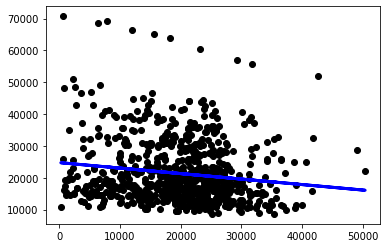

In [5]:
#Chart the original data and the equation on the chart.

pred = linreg.predict(X)
plt.scatter(df['Mileage'], y, color="black")
plt.plot(df['Mileage'], pred, color="blue", linewidth=3)

In [6]:
#Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. 
#(0.8 and greater is considered a strong correlation.)
linreg.score(X,y)

0.02046344732348926

TASK2

In [7]:
#Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
X = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
y = df['Price']
linreg.fit(X,y)
s = f'Y = {linreg.coef_}X + {linreg.intercept_}'
print(s)


Y = [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]X + 6758.755143598106


In [8]:
#Find the equation's  R2  score (use the .score method) to determine whether 
#the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
linreg.score(X,y)

0.4462643536728379

In [ ]:
#Find the combination of the factors that is the best predictor for price.
#Find the linear regression equation for this data using columns 1-5 to column 6.
scores = {}
a = ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
y=df['Price']
for i in a:
  linreg = LinearRegression()
  X = np.array(df[i]).reshape(804,1)
  linreg.fit(X,y)
  scores[i] = linreg.score(X,y)

In [ ]:
sorted_keys = sorted(scores, key=scores.get)
sorted_keys 

['Sound', 'Doors', 'Mileage', 'Leather', 'Cruise', 'Liter', 'Cylinder']

Tasks, Hard Mode

Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [ ]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
Make = pd.get_dummies(df['Make'],drop_first=True)
Model= pd.get_dummies(df['Model'],drop_first=True)
Type = pd.get_dummies(df['Type'],drop_first=True)

In [ ]:
df_new = pd.concat([df,Make],axis=1)

In [ ]:
df_new =  pd.concat([df_new,Model],axis=1)
df_new =  pd.concat([df_new,Type],axis=1)

In [ ]:
df_new

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_new.drop(['Make','Model','Type'],axis=1,inplace=True)
df_new

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Cadillac,...,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
